## Data Visualization with pandas and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("event_transactions_CB.csv")

In [3]:
df.shape

(4955031, 12)

In [4]:
df.head()

,event_id,attendee_id,order_id,purchase_quad,purchase_type,spend_cat,age_cat,gender_cat,attendee_frequency,attendee_zip,Latitude,Longitude
0,1,342606,3786,2,2,0,3,0,1,7430,41.077102,-74.16147
1,1,342606,3786,2,2,1,3,1,1,80249,39.793686,-104.73913
2,1,342606,3786,3,2,0,3,0,1,30517,34.121974,-83.78604
3,1,342606,3786,3,2,1,3,1,1,8558,40.410155,-74.70726
4,1,342606,3786,4,0,0,3,0,1,54171,44.718335,-88.10117


In [21]:
df.describe()

,event_id,attendee_id,order_id,purchase_quad,purchase_type,spend_cat,age_cat,gender_cat,attendee_frequency,attendee_zip,Latitude,Longitude
count,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06
mean,3.644858e+01,1.108229e+05,2.377718e+04,2.489094e+00,7.304608e-01,1.006893e+00,7.244806e-01,4.969301e-01,1.238398e+00,5.164662e+04,3.847151e+01,-9.235384e+01
std,1.239424e+01,1.346404e+05,1.975267e+04,8.085041e-01,6.928595e-01,8.152101e-01,1.129551e+00,4.999906e-01,7.429507e-01,3.158281e+04,5.641090e+00,1.608571e+01
min,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.001000e+03,2.472339e+01,-1.243589e+02
25%,2.800000e+01,1.930500e+04,7.227000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.844700e+04,3.378659e+01,-1.047118e+02
50%,3.700000e+01,3.739900e+04,1.992000e+04,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.412700e+04,4.000181e+01,-8.816205e+01
75%,4.700000e+01,2.089880e+05,3.523100e+04,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,8.030200e+04,4.210538e+01,-7.947800e+01
max,5.400000e+01,4.138390e+05,9.999900e+04,4.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,9.953600e+04,4.897130e+01,-7.218564e+01


In [5]:
unique_attendee = df['attendee_id'].unique().shape[0]
unique_attendee

24668

In [6]:
unique_quad = df['purchase_quad'].unique().shape[0]
unique_quad

4

In [7]:
unique_type = df['purchase_type'].unique().shape[0]
unique_type

3

In [8]:
unique_zip = df['attendee_zip'].unique().shape[0]
unique_zip

4400

0    2492727
1    2462304
Name: gender_cat, dtype: int64


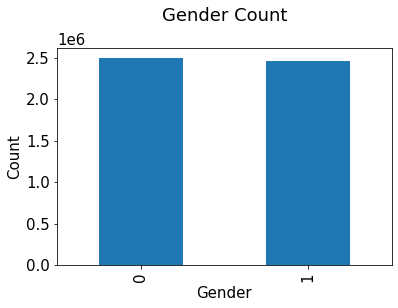

In [9]:
plt.rc("font", size=15)
print(df.gender_cat.value_counts(sort=False))
df.gender_cat.value_counts(sort=False).plot(kind='bar')
plt.title('Gender Count\n')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

0    3333756
1     350670
2     572661
3     697944
Name: age_cat, dtype: int64


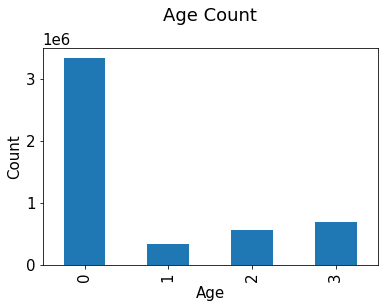

In [10]:
plt.rc("font", size=15)
print(df.age_cat.value_counts(sort=False))
df.age_cat.value_counts(sort=False).plot(kind='bar')
plt.title('Age Count\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
attendee_zip = pd.DataFrame(df.groupby(['attendee_id', 'attendee_zip'])['attendee_zip'].count())
attendee_zip

attendee_zip
attendee_id attendee_zip              
10          7001                     1
            7010                     1
            7051                     1
            7065                     1
            7066                     2
...                                ...
413839      98404                    1
            98527                    1
            98629                    1
            99029                    1
            99309                    1

[4313399 rows x 1 columns]

In [17]:
#Gender category per event ID
gender_total = pd.DataFrame(df.groupby(['event_id', 'gender_cat'])['gender_cat'].count())
gender_total

gender_cat
event_id gender_cat            
1        0                11625
         1                11130
2        0                 6168
         1                 5673
3        0                 2943
...                         ...
52       1                79548
53       0                77025
         1                76575
54       0               137034
         1               136539

[106 rows x 1 columns]

In [19]:
#Age category per event ID
age_total = pd.DataFrame(df.groupby(['event_id', 'age_cat'])['age_cat'].count())
age_total

age_cat
event_id age_cat         
1        0          15468
         1           1533
         2           2472
         3           3282
2        0           8490
...                   ...
53       3          21939
54       0         183114
         1          19803
         2          31341
         3          39315

[212 rows x 1 columns]

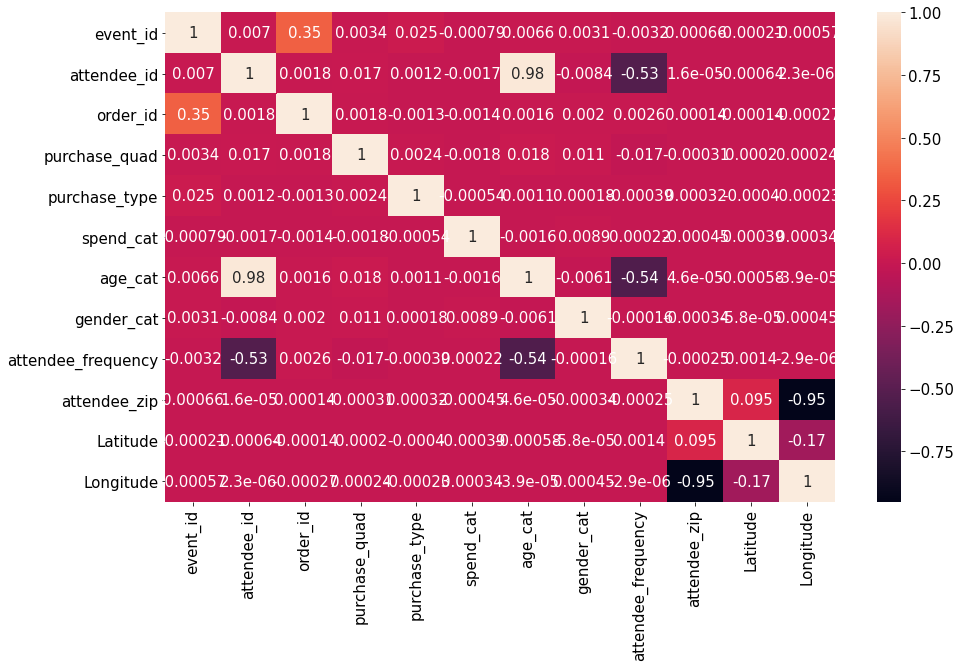

In [22]:
plt.subplots(figsize = (15,9))
sns.heatmap(df.corr(), annot= True)